In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import ensemble 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Metadata for Housing Dataset Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size
    
BuildingArea: Building Size

CouncilArea: Governing council for the area

In [29]:
df= pd.read_csv('housing_data.csv')

In [30]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [31]:
#Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [32]:
categorical = df.select_dtypes(include = ['object'])
print('Unique values in categorical features')
for column in categorical.columns:
    print(f'{column}: {categorical[column].nunique()}')


Unique values in categorical features
Suburb: 351
Address: 34009
Type: 3
Method: 9
SellerG: 388
Date: 78
CouncilArea: 33
Regionname: 8


In [33]:
#Let us get dummies for the categorical variables and drop some of the features  with many unique values and drop the rows
# with missing values
df_features = pd.get_dummies(df.drop(['Suburb','Address', 'SellerG', 'Date', 'CouncilArea'], 1)).dropna()

In [34]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 33 columns):
Rooms                                    8887 non-null int64
Price                                    8887 non-null float64
Distance                                 8887 non-null float64
Postcode                                 8887 non-null float64
Bedroom2                                 8887 non-null float64
Bathroom                                 8887 non-null float64
Car                                      8887 non-null float64
Landsize                                 8887 non-null float64
BuildingArea                             8887 non-null float64
YearBuilt                                8887 non-null float64
Lattitude                                8887 non-null float64
Longtitude                               8887 non-null float64
Propertycount                            8887 non-null float64
Type_h                                   8887 non-null uint8
Type_t        

#We have reduced the dataframes from 34857 rows to 8887 entries and now we have 384 features. Let us create our features and  target 

In [35]:
features = df_features.drop(['Price'], 1)
target = df_features['Price']

In [36]:
#Split the data into train and test set
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.3, random_state=2)

Linear Regression

In [37]:
#Instantiate and fit our model on Training set
rm = linear_model.LinearRegression()
rm_model= rm.fit(X_train, y_train)
y_pred = rm.predict(X_train)

print('\nR-squared on training set:')
print(rm.score(X_train, y_train))

Cross_validation = cross_val_score(rm, X_train, y_train, cv=5)
print('Cross Validation Accuracy scores on Training set {:.3f}(+/-){:.2f})'.format(Cross_validation.mean(), (Cross_validation.std())*2))


R-squared on training set:
0.6413236797463819
Cross Validation Accuracy scores on Training set 0.634(+/-)0.07)


In [38]:
#Linear Regression on Test set
rm_t = linear_model.LinearRegression()
rm_t_model = rm_t.fit(X_test, y_test)
y_pred = rm_t.predict(X_test)

print('\nR-squared on test set:')
print(rm.score(X_test, y_test))

Cross_Validation = cross_val_score(rm_t, X_test, y_test, cv=5)
print('Cross Validation Accuracy scores on Test set {:.3f}(+/-){:.2f})'.format(Cross_validation.mean(), (Cross_validation.std())*2))


R-squared on test set:
0.6658617536942455
Cross Validation Accuracy scores on Test set 0.634(+/-)0.07)


In [39]:
#Lasso Regression on Training set
lrm= linear_model.Lasso(alpha= 3, max_iter = 5000)
lasso = lrm.fit(X_train, y_train)
lasso_predict = lrm.predict(X_test)

print('\nLasso Regression R-squared on training set:')
print(lrm.score(X_train, y_train))

Cross_validation= cross_val_score(lrm, X_train, y_train, cv=5)
print('Cross Validation Accuracy score on Traininig set {:.3f}(+/-){:.2f})'.format(Cross_validation.mean(), (Cross_validation.std())*2))

C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Lasso Regression R-squared on training set:
0.6413236503160327


C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Cross Validation Accuracy score on Traininig set 0.634(+/-)0.07)


C:\Users\18644\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [67]:
#Lasso Regression on Test set
lrm= linear_model.Lasso(alpha= 3, max_iter = 5000)
lasso = lrm.fit(X_test, y_test)
lasso_predict = lrm.predict(X_test)

print('\nLasso Regression R-squared on test set:')
print(lrm.score(X_train, y_train))

Cross_validation= cross_val_score(lrm, X_test, y_test, cv=5)
print('Cross Validation Accuracy score on Test set {:.3f}(+/-){:.2f})'.format(Cross_validation.mean(), (Cross_validation.std())*2))


Lasso Regression R-squared on test set:
0.6364383556521882
Cross Validation Accuracy score on Test set 0.663(+/-)0.08)


Random Forest

In [41]:
#Training set
rfr = RandomForestRegressor(n_estimators =100)
rfr_model= rfr.fit(X_train, y_train)
y_predict = rfr.predict(X_train)

print('Random forest Accuracy Score:', rfr.score(X_train, y_train))
cross_val = cross_val_score(rfr, X_train, y_train, cv=5)
print('Cross Validation Accuracy score for Training set {:.3f}(+/-){:.2f})'. format(cross_val.mean(), (cross_val.std())*2))

Random forest Accuracy Score: 0.9743719807297924
Cross Validation Accuracy score for Training set 0.811(+/-)0.07)


In [42]:
#Test set
rfr = RandomForestRegressor(n_estimators =100)
rfr_model= rfr.fit(X_test, y_test)
y_predict = rfr.predict(X_test)

print('Random forest Accuracy Score:', rfr.score(X_test, y_test))
cross_val = cross_val_score(rfr, X_test, y_test, cv=5)
print('Cross Validation Accuracy score for Test set {:.3f}(+/-){:.2f})'. format(cross_val.mean(), (cross_val.std())*2))

Random forest Accuracy Score: 0.9727640162858822
Cross Validation Accuracy score for Test set 0.796(+/-)0.06)


In [ ]:
#Identifying the major features

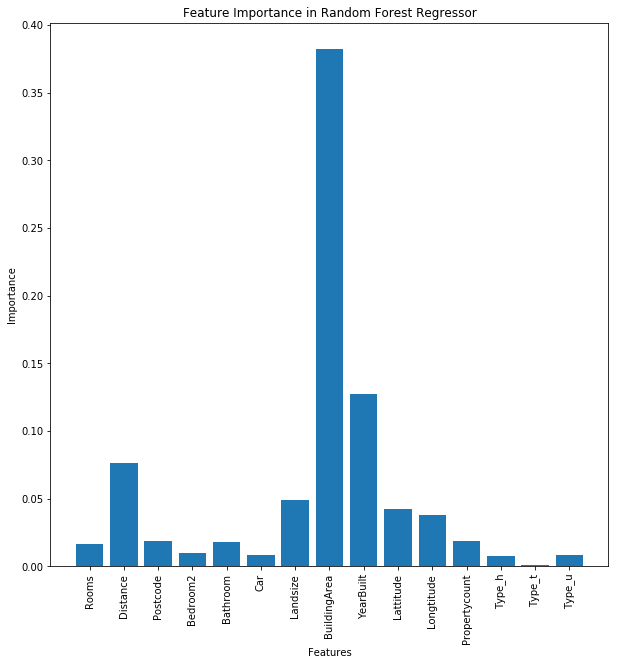

In [45]:
plt.figure(figsize=(10,10))
plt.bar(features.columns[0:15], rfr.feature_importances_[0:15])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

Gradient Boosted Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
#Training set
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5)
gbr.fit(X_train, y_train)
y_predict= gbr.predict(X_train)
print('Accuracy score on Training set:', gbr.score(X_train, y_train))

Accuracy score on Training set: 0.9318710282509288


In [65]:
#Test set
gbr = GradientBoostingRegressor(learning_rate = 0.01, n_estimators=1000, max_depth=5)
gbr.fit(X_test, y_test)
y_predict = gbr.predict(X_test)
print('Accuracy score on Training set:', gbr.score(X_test, y_test))

cross_val= cross_val_score(gbr, X_test, y_test, cv=5)
print('Cross Validation Accuracy score for Test set {:.3f}(+/-){:.2f})'. format(cross_val.mean(), (cross_val.std())*2))


Accuracy score on Training set: 0.9540655412124978
Cross Validation Accuracy score for Test set 0.807(+/-)0.04)


Text(0.5, 1.0, 'Feature Importance in Gradient Boosted Regressor')

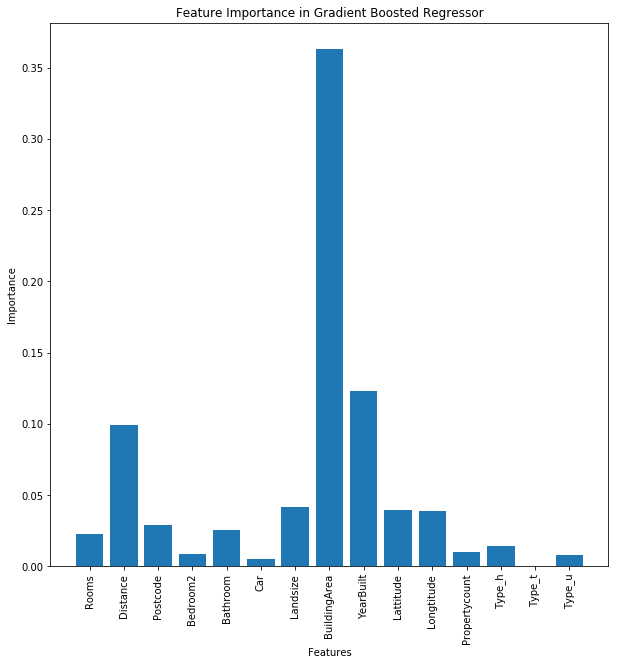

In [66]:
#Identifying the major features
plt.figure(figsize=(10,10))
plt.bar(features.columns[0:15], gbr.feature_importances_[0:15])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Gradient Boosted Regressor')

Gradient Boosting Regreesor seems to perform well on the test dataset in determining the housing prices out of the models I have tried here. We can see the Building area to be the dominant feature in creating the value of the house followed by built year and distance. 